In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Reload dataset (with no header to prevent misinterpretation)
file_path = "/content/drive/My Drive/blog-gender-dataset.xlsx"
df = pd.read_excel(file_path, header=None)  # Read without using the first row as header

# Rename the first two columns
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ["Text", "Gender"]  # Assign correct column names

# Drop rows with missing values
df = df.dropna()

# Display cleaned dataset info and first few rows
print("Cleaned Dataset Info:")
print(df.info())

print("\nFirst 5 Rows of Cleaned Dataset:")
df.head()

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3226 entries, 0 to 3231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3226 non-null   object
 1   Gender  3226 non-null   object
dtypes: object(2)
memory usage: 75.6+ KB
None

First 5 Rows of Cleaned Dataset:


,Text,Gender
0,Long time no see. Like always I was rewriting...,M
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M
2,Who moved my Cheese??? The world has been de...,M
3,Yesterday I attended a biweekly meeting of an...,M
4,Liam is nothing like Natalie. Natalie never w...,F


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values in Dataset:")
print(missing_values)

# Print the total number of entries
print(f"Total number of entries in the dataset: {len(df)}")

Missing Values in Dataset:
Text      0
Gender    0
dtype: int64
Total number of entries in the dataset: 3226


In [4]:
print("Unique values in Gender column:")
print(df["Gender"].unique())

Unique values in Gender column:
['M' 'F' ' M' ' F' 'F ' ' M ' 'm' 'f']


In [5]:
# Standardize the Gender column (strip spaces & convert to uppercase)
df["Gender"] = df["Gender"].str.strip().str.upper()

# Check unique values again to confirm the fix
print("Cleaned Unique values in Gender column:")
print(df["Gender"].unique())

Cleaned Unique values in Gender column:
['M' 'F']


In [6]:
print("Gender distribution:")
print(df["Gender"].value_counts())

Gender distribution:
Gender
M    1678
F    1548
Name: count, dtype: int64


In [7]:
# Find duplicate rows based on 'Text' column
duplicates = df[df.duplicated(subset=['Text'])]

print(f"Number of duplicate entries: {len(duplicates)}")
print("Sample duplicate entries:")
duplicates.head()

Number of duplicate entries: 11
Sample duplicate entries:


,Text,Gender
1445,Suppose you want to buy a cart horse. Of cour...,F
1446,Two LA Landmarks: Pacific Dining Car and Lang...,F
1556,Man...this car rocks! Push button start...auto...,M
1743,I've found out that my best friend plans to co...,F
1780,Real school starts on Wednesday. I am excited ...,F


In [8]:
# Remove duplicate rows
df = df.drop_duplicates(subset=['Text'], keep='first')

print(f"Number of entries after removing duplicates: {len(df)}")

Number of entries after removing duplicates: 3215


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenization
    words = word_tokenize(text)
    # Removing stop words and lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back to a single string
    return " ".join(words)

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows after preprocessing
print("Sample preprocessed text:")
print(df[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Sample preprocessed text:
                                                Text  \
0   Long time no see. Like always I was rewriting...   
1   Guest Demo: Eric Iverson’s Itty Bitty Search\...   
2  Who moved my Cheese???   The world has been de...   
3   Yesterday I attended a biweekly meeting of an...   
4   Liam is nothing like Natalie. Natalie never w...   

                                      Processed_Text  
0  long time see like always rewriting scratch co...  
1  guest demo eric iverson ’ itty bitty search fe...  
2  moved cheese world developing area create diff...  
3  yesterday attended biweekly meeting informal u...  
4  liam nothing like natalie natalie never went d...  


In [10]:
df.head()

,Text,Gender,Processed_Text
0,Long time no see. Like always I was rewriting...,M,long time see like always rewriting scratch co...
1,Guest Demo: Eric Iverson’s Itty Bitty Search\...,M,guest demo eric iverson ’ itty bitty search fe...
2,Who moved my Cheese??? The world has been de...,M,moved cheese world developing area create diff...
3,Yesterday I attended a biweekly meeting of an...,M,yesterday attended biweekly meeting informal u...
4,Liam is nothing like Natalie. Natalie never w...,F,liam nothing like natalie natalie never went d...


In [11]:
!pip install transformers
!pip install tensorflow

In [12]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# BERT Model and Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

#Data Preprocessing

In [13]:
# Encode Gender Labels
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 0, Female -> 1

# BERT Tokenization Function
def bert_encode(texts, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_masks)

# Prepare Inputs
X_input_ids, X_attention_masks = bert_encode(df['Processed_Text'].tolist(), tokenizer)

# Convert tensors to numpy arrays for train_test_split
X_input_ids = X_input_ids.numpy()
X_attention_masks = X_attention_masks.numpy()

# Train-Test Split
X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
    X_input_ids, X_attention_masks, df['Gender'].values, test_size=0.2, random_state=42, stratify=df['Gender']
)

print(f"Training samples: {len(X_train_ids)}, Testing samples: {len(X_test_ids)}")

Training samples: 2572, Testing samples: 643


#Model Definition

In [14]:
# Necessary Imports
from tensorflow.keras.layers import Lambda, Input, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# Hybrid BERT-CNN Model
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_masks = Input(shape=(128,), dtype=tf.int32, name='attention_masks')

# BERT Embeddings with Lambda Layer
def extract_bert_embeddings(inputs):
    bert_output = bert_model(inputs)
    return bert_output.last_hidden_state

# Use Lambda to extract embeddings from BERT
bert_embeddings = Lambda(lambda x: extract_bert_embeddings(x), output_shape=(128, 768))([input_ids, attention_masks])

# CNN Layer on BERT Embeddings
conv1 = Conv1D(filters=128, kernel_size=3, activation='relu')(bert_embeddings)
pool1 = GlobalMaxPooling1D()(conv1)

conv2 = Conv1D(filters=128, kernel_size=5, activation='relu')(bert_embeddings)
pool2 = GlobalMaxPooling1D()(conv2)

# Concatenate CNN outputs
concat = Concatenate()([pool1, pool2])
dropout = Dropout(0.5)(concat)

# Fully Connected Layer
dense = Dense(64, activation='relu')(dropout)
dropout2 = Dropout(0.5)(dense)

# Output Layer
output = Dense(1, activation='sigmoid')(dropout2)

# Compile the Model
model = Model(inputs=[input_ids, attention_masks], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_masks     │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 768)  │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_masks[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 126, 128)  │    295,040 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 124, 128)  │    491,648 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     16,448 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 803,201 (3.06 MB)

 Trainable params: 803,201 (3.06 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Reshape the input IDs and attention masks to remove the extra dimension
X_train_ids = X_train_ids.squeeze(1)
X_test_ids = X_test_ids.squeeze(1)
X_train_masks = X_train_masks.squeeze(1)
X_test_masks = X_test_masks.squeeze(1)

# Train the model
history = model.fit(
    [X_train_ids, X_train_masks], y_train,
    validation_data=([X_test_ids, X_test_masks], y_test),
    batch_size=16,
    epochs=5,
    verbose=1
)

Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 249ms/step - accuracy: 0.5217 - loss: 0.8612 - val_accuracy: 0.5163 - val_loss: 0.6895
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 143ms/step - accuracy: 0.5730 - loss: 0.6893 - val_accuracy: 0.6236 - val_loss: 0.6810
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 150ms/step - accuracy: 0.5699 - loss: 0.6802 - val_accuracy: 0.6501 - val_loss: 0.6353
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.6374 - loss: 0.6495 - val_accuracy: 0.6843 - val_loss: 0.6193
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - accuracy: 0.6652 - loss: 0.6106 - val_accuracy: 0.6796 - val_loss: 0.6031


In [16]:
# Evaluate the model on test data
loss, accuracy = model.evaluate([X_test_ids, X_test_masks], y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.6862 - loss: 0.5952
Test Accuracy: 0.6796
Test Loss: 0.6031


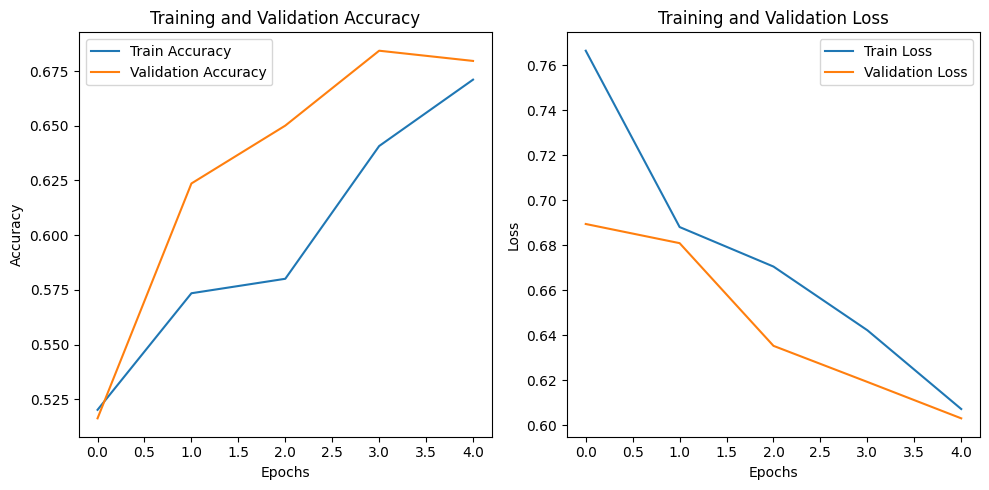

In [17]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()